In [2]:
import requests
import time
import dhlab.nbtext as nb
from IPython.display import Image

# 1b API requests: Getting data from the web

APIs are systems or sets of rules that allow different programs to communicate with each other, and the term commonly refers to web APIs that facilitate communication between clients (like browsers and apps) and servers on the internet. You can think of them as websites for programs, such as this API that returns random acitivity suggestion in the machine readable format json:
https://www.boredapi.com/api/activity
Another API, the Dog API, returns a random link to a image of a dog, which we then can display in Jupyter Notebook:

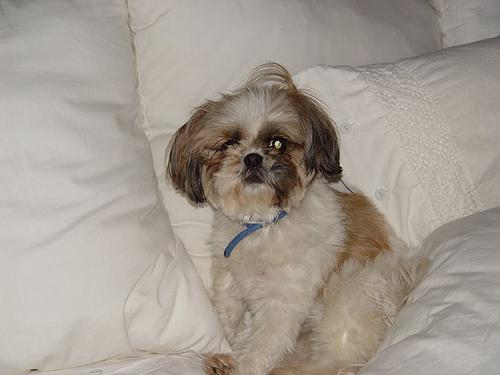

In [3]:
dog = requests.get("https://dog.ceo/api/breeds/image/random").json()["message"]
Image(dog)

## Contents
- dhlab
- requests
- The Corpuscle API under the hood
- Multiple requests

## The National Library of Norway: dhlab
The dhlab python library by the National Library of Norway is described in depth in a series of Jupyter Notebooks:
https://github.com/DH-LAB-NB/DHLAB

Under the hood, dhlab uses the Python library `requests` to get data from api.nb.no.

Since we have installed and imported dhlab, we can have a look at how to build a tiny corpus from the National Library collections by passing metadata in a function:

In [4]:
ibsen = nb.book_corpus(author="Ibsen%Henrik%", limit=10)
ibsen

urn         author  \
0  2006082200046  Ibsen, Henrik   
1  2010060820006  Ibsen, Henrik   
2  2010100709008  Ibsen, Henrik   
3  2010090320019  Ibsen, Henrik   
4  2010071423006  Ibsen, Henrik   
5  2011041209005  Ibsen, Henrik   
6  2010063020019  Ibsen, Henrik   
7  2013062608015  Ibsen, Henrik   
8  2010101820005  Ibsen, Henrik   
9  2010040923002  Ibsen, Henrik   

                                               title  year  
0                            Hærmændene på Helgeland  1894  
1                                              Brand  2005  
2                                              Brand  1999  
3                                              Brand  1960  
4                              Samlede digter verker  1918  
5                               Fru Inger til Østråt  1998  
6                                     Samlede verker  1928  
7                                          Vildanden  1925  
8  Hedda Gabler ; The master builder ; John Gabri...  1966  
9                                       Oxford Ibsen  1966

You can save the corpus to an excel file:

In [5]:
nb.save_frame_to_excel(ibsen, "ibsen.xlsx")

Det eksisterer allerede en fil ibsen.xlsx - velg nytt navn og prøv igjen


...and load it back in:

In [6]:
ibsen2 = nb.restore_metadata_from_excel('ibsen.xlsx')
ibsen2

urn         author  \
0  2010090120010  Ibsen, Henrik   
1  2010101120011  Ibsen, Henrik   
2  2010040923001  Ibsen, Henrik   
3  2011061708156  Ibsen, Henrik   
4  2015041408019  Ibsen, Henrik   
5  2010041623033  Ibsen, Henrik   
6  2010082422023  Ibsen, Henrik   
7  2010050513001  Ibsen, Henrik   
8  2010091520008  Ibsen, Henrik   
9  2010090120009  Ibsen, Henrik   

                                               title  year  
0                               fantasy of Peer Gynt  1909  
1  doll's house ; Ghosts ; An enemy of the people...  1950  
2                                       Oxford Ibsen  1977  
3                             Henrik Ibsens skrifter  2006  
4                                      "Rosmersholm"  1954  
5                                   Œuvres complètes  1930  
6                                     Samlede verker  1962  
7                                       Rosmershol'm  2007  
8                                        Early plays  1971  
9                                         Four plays  1957

Now that we have our small corpus, we can inspect it by generating concordances - looking at words in their context:

In [7]:
nb.urn_concordance(word = 'Bergen', urns = ibsen)

## Requests

As mentioned, dhlab uses the `requests` library to receive data from a server. With requests, you can get data from an API or a regular website using a single line of code.  A `HTTP Get request` returns a response with its associated response code - 200 if your request is successful:

In [ ]:
requests.get("https://www.boredapi.com/api/activity")

Another response code you probably are familiar with is 404: not found.

The content of the response is a variable in the Response object. If you send a request to a regular website, the response will be html. Here are first hundred characters of uib.no:

In [ ]:
requests.get("https://www.uib.no").text[:100]

If you're using an API that returns json, you can use the json() method to get it into a Python dictionary:

In [ ]:
requests.get("https://www.boredapi.com/api/activity").json()

Commercial APIs, such as those apps use to access social media, are usually restricted. If you for instance want to collect data from Twitter, you would have to apply for access:
https://developer.twitter.com/en/products/twitter-api
When the have to authenticate yourself, the process of connecting to an API is somewhat more complicated:
https://www.geeksforgeeks.org/authentication-using-python-requests/

<font color = royalblue>

#### Explore for yourself
    
</font>
Try using the requests library to acess some of the open APIs listed here:
https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/